# Explore here

In [5]:
# Your code here
import shutil
import os

def separar_imagenes(ruta_carpeta):
    archivos = os.listdir(ruta_carpeta)
    for archivo in archivos:
        if archivo.startswith('dog'):
            destino = os.path.join(ruta_carpeta,'dog')
        elif archivo.startswith('cat'):
            destino = os.path.join(ruta_carpeta,'cat')
        else:
            pass
        if not os.path.exists(destino):
            os.makedirs(destino)
        shutil.move(os.path.join(ruta_carpeta,archivo),destino)

separar_imagenes('../data/raw/train/')

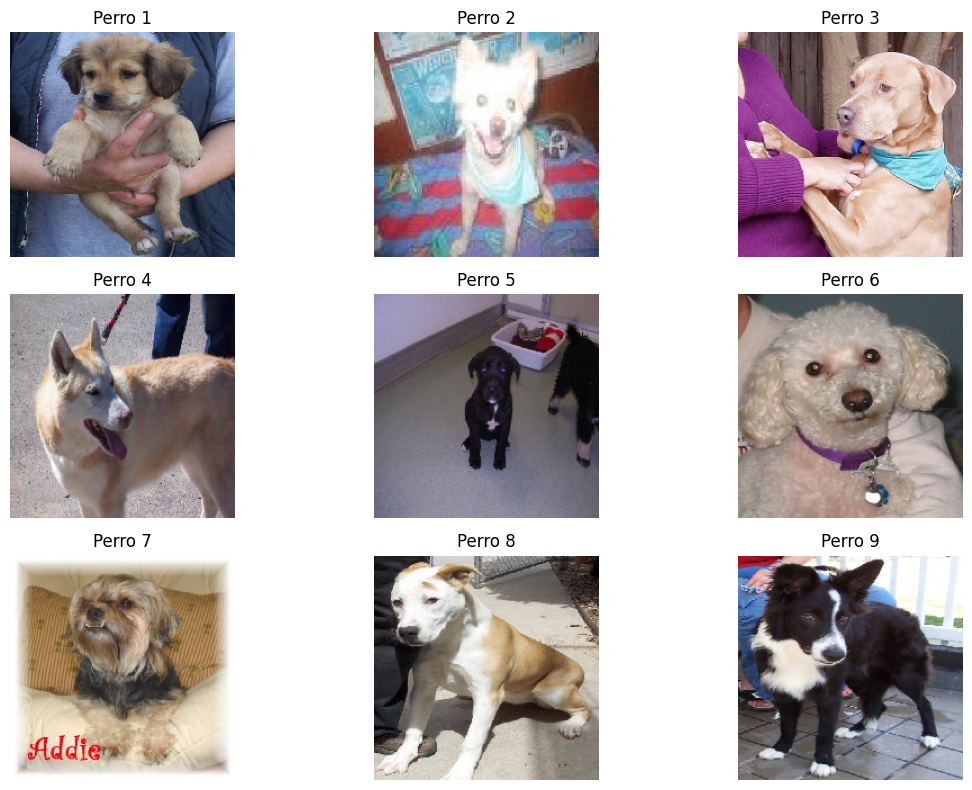

In [12]:
data_dir = '../data/raw/train/'

subfolder_dog = os.path.join(data_dir, 'dog')

imagenes_perros = os.listdir(subfolder_dog)

dog_imagenes = []
from keras.preprocessing import image
for i in range(9):
    ruta_imagen = os.path.join(subfolder_dog, imagenes_perros[i])
    img = image.load_img(ruta_imagen, target_size=(200, 200))
    img_array = image.img_to_array(img)
    img_array = img_array/255.0
    dog_imagenes.append(img_array)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(dog_imagenes[i])
    plt.axis('off')
    plt.title('Perro '+str(i+1))

plt.tight_layout()
plt.show()


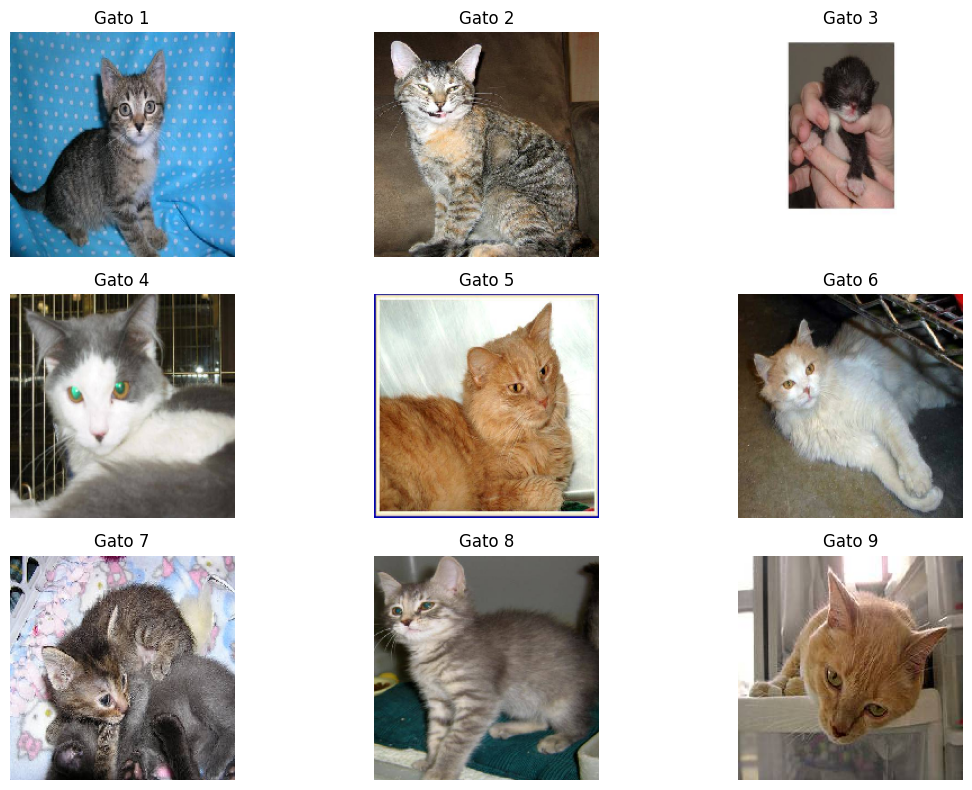

In [13]:
subfolder_cat = os.path.join(data_dir, 'cat')

imagenes_gatos = os.listdir(subfolder_cat)

cat_imagenes = []
from keras.preprocessing import image
for i in range(9):
    ruta_imagen = os.path.join(subfolder_cat, imagenes_gatos[i])
    img = image.load_img(ruta_imagen, target_size=(200, 200))
    img_array = image.img_to_array(img)
    img_array = img_array/255.0
    cat_imagenes.append(img_array)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(cat_imagenes[i])
    plt.axis('off')
    plt.title('Gato '+str(i+1))

plt.tight_layout()
plt.show()

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '../data/raw/train'
test_dir = '../data/raw/'
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=['dog', 'cat']
)

test_data = datagentest.flow_from_directory(
    test_dir,
    target_size=image_size,
    classes=['test1']
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))


In [19]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [23]:
model.fit(train_data,epochs=21)

Epoch 1/21
 68/782 ━━━━━━━━━━━━━━━━━━━━ 1:22:38 7s/step - accuracy: 0.4980 - loss: 0.7698

In [ ]:
model.save('../models/modelo.h5')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=3, verbose=1, mode='auto')
history = model.fit(train_data, epochs=3, validation_data=test_data, callbacks=[checkpoint,early], steps_per_epoch=100, validation_steps=10)